# Training Multiple Models

# Import the Libraries

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Load Dataset

In [203]:
df = pd.read_csv('Real_Estate.csv')

In [204]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [205]:
df.shape

(414, 7)

# -Displaying first few records

In [206]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


# Detailed summary about the Dataset

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


# Checking for unique values

In [208]:
df.nunique()

Transaction date                       414
House age                              178
Distance to the nearest MRT station    183
Number of convenience stores            11
Latitude                               414
Longitude                              414
House price of unit area               384
dtype: int64

# Checking for duplicates if any

In [209]:
df[df. duplicated( )]

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area


# Checking and Handling Missing Values

In [210]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

# Calculate correlations

In [211]:
correlations = df.corr(numeric_only=True)
print(correlations)

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

<Axes: >

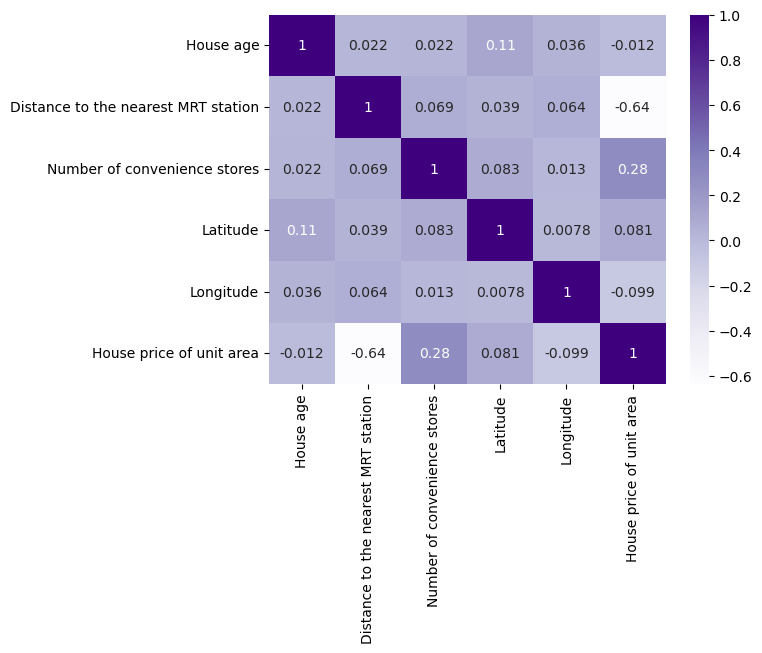

In [212]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Purples')

# Find the most expensive property

In [213]:
max_price = df['House price of unit area'].max()
expensive_property = df[df['House price of unit area'] == max_price]
print(expensive_property)

               Transaction date  House age  \
172  2013-01-15 14:41:17.944841        0.0   

     Distance to the nearest MRT station  Number of convenience stores  \
172                             292.9978                            10   

      Latitude   Longitude  House price of unit area  
172  24.932805  121.510373                 65.571716  


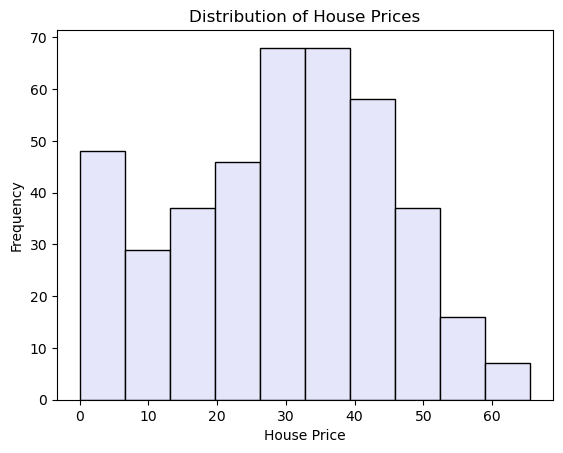

In [214]:
plt.hist(df['House price of unit area'], bins=10, color='lavender', edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

# Visualize the distribution of property prices, Visualize the distribution of distances to MRT stations, Visualize the distribution of house ages

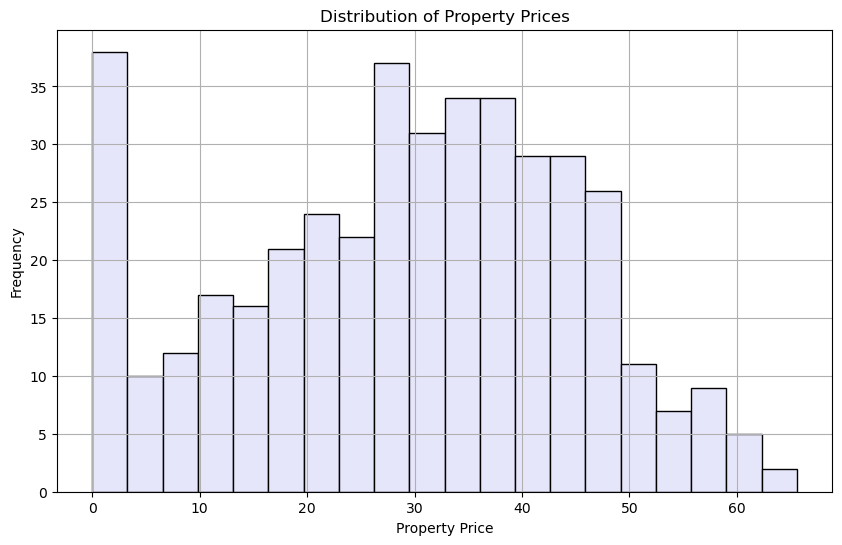

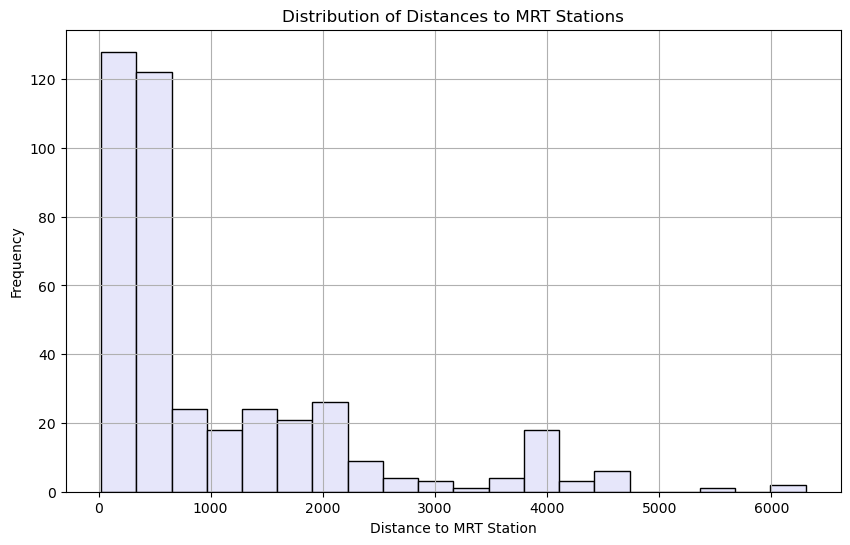

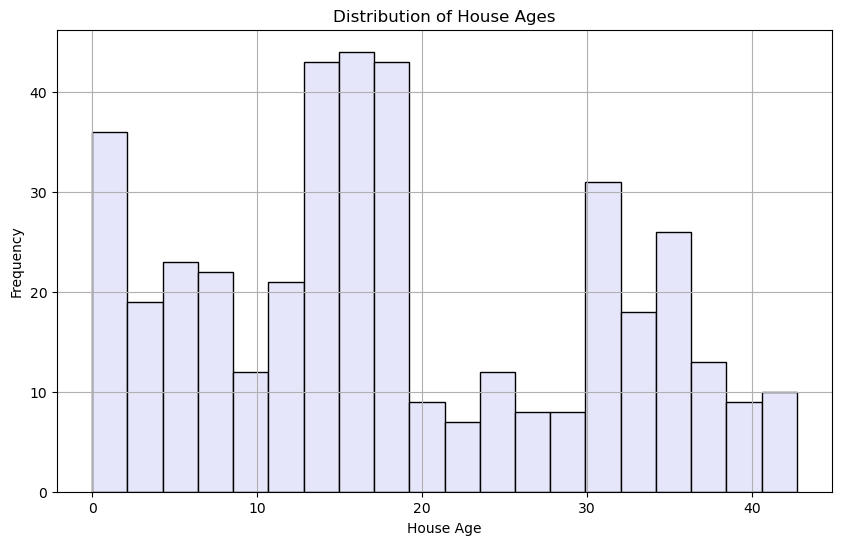

In [215]:
# Visualize the distribution of property prices
plt.figure(figsize=(10, 6))
df['House price of unit area'].hist(bins=20, color='lavender', edgecolor='black')
plt.xlabel('Property Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()

# Visualize the distribution of distances to MRT stations
plt.figure(figsize=(10, 6))
df['Distance to the nearest MRT station'].hist(bins=20, color='lavender', edgecolor='black')
plt.xlabel('Distance to MRT Station')
plt.ylabel('Frequency')
plt.title('Distribution of Distances to MRT Stations')
plt.show()

# Visualize the distribution of house ages
plt.figure(figsize=(10, 6))
df['House age'].hist(bins=20, color='lavender', edgecolor='black')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.title('Distribution of House Ages')
plt.show()

In [216]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


# Property Locations Map based on latitude and longitude data.

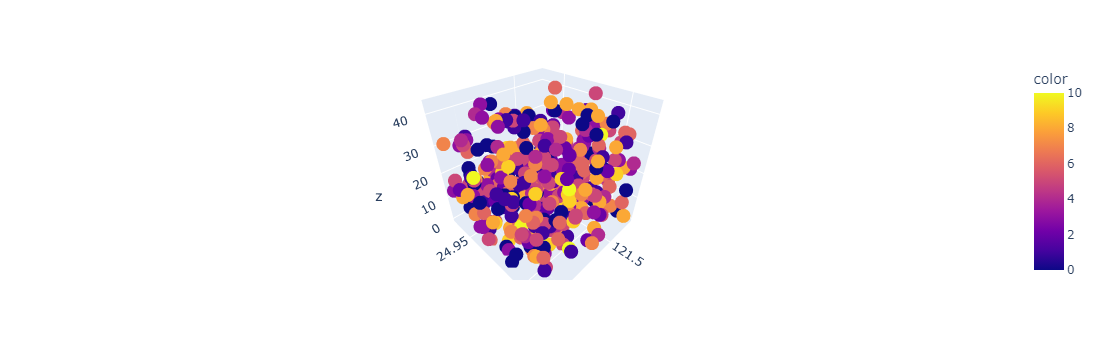

In [217]:
px.scatter_3d(x=df.Longitude,y=df.Latitude,z=df['House age'],color=df['Number of convenience stores'])


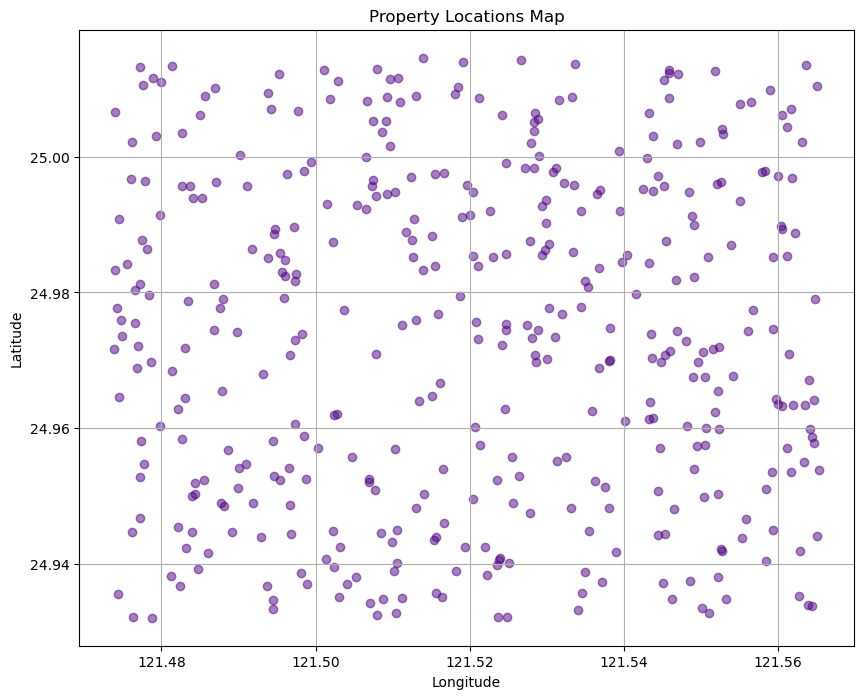

In [218]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c='indigo', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Locations Map')
plt.grid(True)
plt.show()

# Feature Engineering

In [219]:
# Calculate the distance to the nearest MRT station
df['Distance to MRT station'] = np.sqrt((df['Latitude'] - 25.0) ** 2 + (df['Longitude'] - 121.5) ** 2)

In [220]:
df['Distance to MRT station']

0      0.062097
1      0.048535
2      0.028597
3      0.041170
4      0.022890
         ...   
409    0.022984
410    0.052456
411    0.056441
412    0.058325
413    0.053988
Name: Distance to MRT station, Length: 414, dtype: float64

In [221]:
# Create a new feature that represents the distance to the nearest MRT station
df['Distance to MRT station (km)'] = df['Distance to MRT station'] / 1000

In [222]:
df['Distance to MRT station (km)']

0      0.000062
1      0.000049
2      0.000029
3      0.000041
4      0.000023
         ...   
409    0.000023
410    0.000052
411    0.000056
412    0.000058
413    0.000054
Name: Distance to MRT station (km), Length: 414, dtype: float64

There are no missing values in the dataset, which has 7 columns and 414 entries. Below is a quick synopsis of the columns:

Date of transaction: The day the house was sold (object type, meaning that important data like year, month, etc., may need to be extracted or converted).

House age: The house's age expressed in floating-point years.

The distance in meters (float) between the closest mass rapid transit station and the nearest MRT station.

Convenience store count: The total number of convenience stores accessible on foot inside the living circle (integer).

Latitude: The geographic coordinate (float) indicating a location's north-south orientation.

Longitude: The east-west position specified by a geographic coordinate (float).

Price of the house per unit area: This is the price per unit area (float), and it is probably the variable we want to predict.

Thus, we are resolving a regression issue in this case. To determine which regression model will work best for our situation, we will preprocess the data and choose models in the following stages.

# Data Preprocessing 

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

convert "Transaction date" to datetime and extract year and month

In [224]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df['Transaction year'] = df['Transaction date'].dt.year
df['Transaction month'] = df['Transaction date'].dt.month

droping the original "Transaction date" as we've extracted relevant features

In [225]:
df = df.drop(columns=['Transaction date'])

defining features and target variable

In [226]:
X = df.drop('House price of unit area', axis=1)
y = df['House price of unit area']

spliting the data into training and testing

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

scaling the features

In [228]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [229]:
X_train_scaled.shape

(331, 9)

In [230]:
X_test_scaled.shape

(83, 9)

# Model Training and Comparison

We will now train several models and evaluate how well they perform. First, let's look at a few popular models for regression tasks:

For regression problems, a good baseline model is linear regression.

Decision Tree Regressor: To assess the performance of a basic tree-based model.
    
The Random Forest Regressor is an ensemble technique that enhances the performance of decision trees.

Another effective ensemble regression technique is the gradient boosting regression.

Each model will be trained using the training set, and its performance on the test set will be assessed using metrics such as Mean Absolute Error (MAE) and R-squared (R²). These measures will assist us in determining how effectively the model explains the variance in the target variable as well as the average error of the predictions.

First, let's train these models and assess how well they perform:

In [231]:
pip install linear-regression

Note: you may need to restart the kernel to use updated packages.


In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
from sklearn.tree import DecisionTreeRegressor

In [234]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [235]:
from sklearn.metrics import mean_absolute_error, r2_score

# LinearRegression

In [236]:
lr = LinearRegression()

In [237]:
lr

LinearRegression()

In [238]:
lr.fit(X_train_scaled ,y_train)

LinearRegression()

In [239]:
lr_pred = lr.predict(X_test_scaled)

In [240]:
lr_pred

array([ 4.14848958e+01,  3.59571287e+01,  1.97276656e+01,  5.24673442e+00,
        2.99307067e+01,  2.99271479e+01,  3.08317167e+01,  3.43917074e+01,
        2.55633626e+01,  3.19772848e+01,  3.85660321e+01,  4.12134905e+01,
        1.31605118e+01, -1.86052135e+00,  3.57560511e+01,  3.42819997e+01,
        4.03673031e+01,  3.97619162e+01,  3.35048029e+01,  3.19585797e+01,
        4.79019507e+01,  3.53275300e+01,  3.80098619e+01,  2.01036236e+01,
        3.97750501e+01,  2.71441290e+01,  4.39273552e+01,  4.23919097e+01,
        3.60992405e+01,  3.32201215e+01,  3.42095664e+01,  1.33127271e+01,
        2.00887907e+01,  3.31651601e+01,  3.74435234e+01,  2.54856356e+01,
        3.88884375e+01,  3.25870783e+01,  3.46312612e+01,  2.68368363e+01,
       -1.37886777e+00, -3.48152367e+00,  2.89504717e+01,  3.17145770e+01,
        9.15852334e+00,  2.75648673e+01,  3.80737886e+01,  3.65098859e+01,
        1.70960075e+01,  3.06675503e+01,  2.99576914e+01,  2.93670633e+01,
        7.66911086e+00,  

In [241]:
mae = mean_absolute_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

In [242]:
lr = {"MAE": mae, "R²": r2}

In [243]:
lr

{'MAE': 8.371857019065425, 'R²': 0.585128293824156}

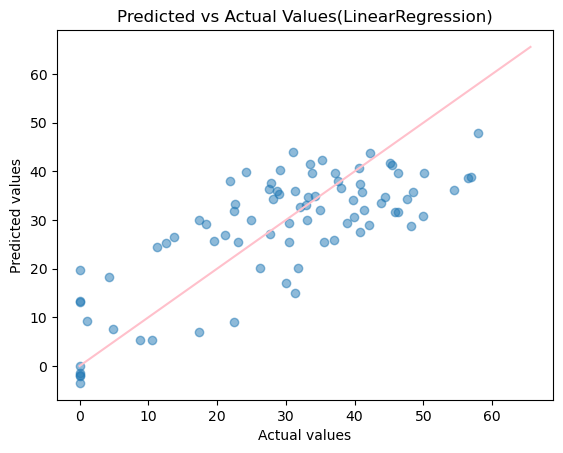

In [244]:
plt.scatter(y_test, lr_pred, alpha=0.5 )

plt.plot([y.min(), y.max()],[y.min(), y.max()], color = "pink")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Values(LinearRegression)")



plt.show()

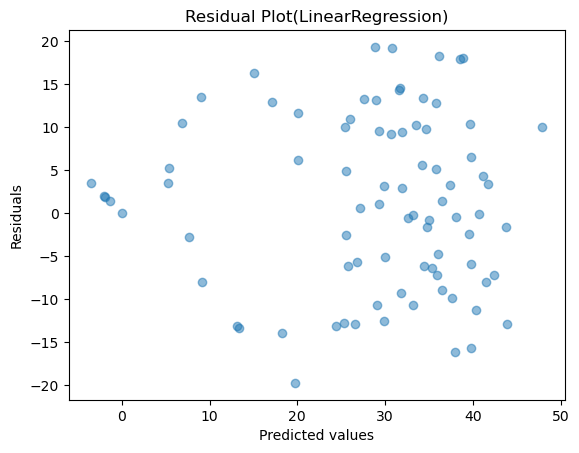

In [245]:
plt.scatter(lr_pred, y_test - lr_pred, alpha=0.5 )
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot(LinearRegression)")
plt.show()

# DecisionTreeRegressor

In [246]:
dtr = DecisionTreeRegressor(random_state=42)

In [247]:
dtr

DecisionTreeRegressor(random_state=42)

In [248]:
dtr.fit(X_train_scaled ,y_train)

DecisionTreeRegressor(random_state=42)

In [249]:
dtr_pred = dtr.predict(X_test_scaled)

In [250]:
dtr_pred

array([41.11505105, 29.72640084, 32.41967627,  0.        , 43.57453104,
       47.25603168, 45.48583821, 52.76115275, 33.3560109 , 34.79054681,
       38.56842027, 35.13161908,  3.39830476,  0.        , 34.79054681,
       19.5472047 , 32.95758377, 19.2173606 , 44.35062301, 44.80793563,
       58.16330444, 12.30087069, 23.04599311, 11.06078997, 47.35555099,
       47.25603168, 35.13161908, 23.10016713, 45.66512995, 33.94583548,
       20.16895031,  0.        ,  0.        , 26.75930501, 44.29544499,
       14.62680374, 28.72889336, 38.98826969, 34.91191452, 38.67655041,
       22.21030128,  1.44333771, 47.16677813, 21.6547096 ,  3.39830476,
       25.88302273, 50.61249953, 47.93045608,  6.98726874, 31.86071601,
       38.67655041, 18.70607451,  0.        ,  0.        ,  0.        ,
       19.28513785, 47.16677813, 44.48092654, 45.34845422, 50.76868745,
       48.4698805 , 43.57453104, 28.39451475, 49.5873159 , 33.3560109 ,
        7.60804222, 20.07341746, 15.59324741, 21.89934295, 57.80

In [251]:
mae = mean_absolute_error(y_test, dtr_pred)
r2 = r2_score(y_test, dtr_pred)

In [252]:
dtr = {"MAE": mae, "R²": r2}

In [253]:
dtr

{'MAE': 13.190915622589813, 'R²': -0.10990054995740706}

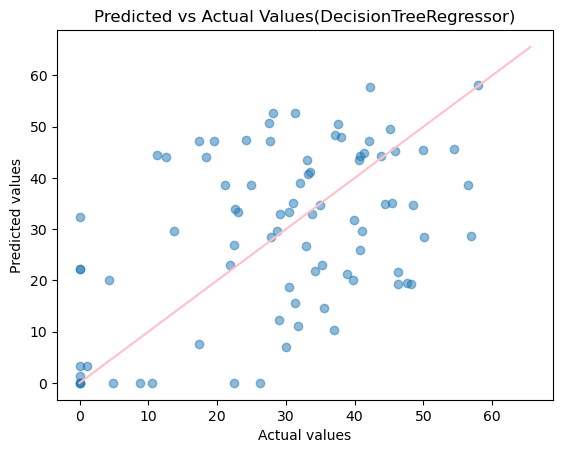

In [254]:
plt.scatter(y_test, dtr_pred, alpha=0.5 )

plt.plot([y.min(), y.max()],[y.min(), y.max()], color = "pink")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Values(DecisionTreeRegressor)")



plt.show()

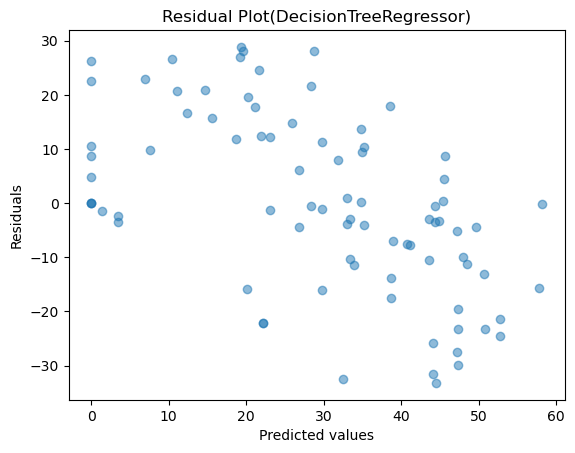

In [255]:
plt.scatter(dtr_pred, y_test - dtr_pred, alpha=0.5 )
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot(DecisionTreeRegressor)")
plt.show()

# RandomForestRegressor

In [256]:
rfr = RandomForestRegressor(random_state=42)

In [257]:
rfr

RandomForestRegressor(random_state=42)

In [258]:
rfr.fit(X_train_scaled ,y_train)

RandomForestRegressor(random_state=42)

In [259]:
rfr_pred = rfr.predict(X_test_scaled)

In [260]:
rfr_pred

array([37.42696922, 30.62433194, 24.44945611,  1.96791352, 26.17576428,
       33.28405468, 29.14702458, 33.98903699, 30.64453661, 33.75851399,
       42.09603822, 44.93203213,  8.13297365,  2.08794418, 32.73438916,
       27.75617854, 41.71119357, 41.61594324, 37.13395646, 27.79605411,
       51.05803636, 31.71111066, 33.39622929, 16.26060463, 37.58263084,
       34.25160511, 39.81183388, 39.44408638, 33.97950675, 29.48483654,
       31.25501808,  9.61770862, 13.06069843, 31.21158848, 36.69955726,
       26.98391341, 33.72283793, 36.77175206, 35.8332684 , 27.64622192,
        9.72606611,  3.12169538, 35.16946263, 30.45387649,  6.22028301,
       29.14629519, 39.700497  , 35.57008306,  3.90307755, 25.89804559,
       35.16636558, 24.84529251,  7.0165612 ,  3.81267914,  6.67701189,
       30.88034926, 35.14985391, 28.43746779, 33.29475071, 36.49472605,
       37.25736028, 38.41538426, 36.01078654, 41.86161978, 32.58616457,
        3.46935822, 24.77869745, 22.08119872, 32.71938487, 41.30

In [261]:
mae = mean_absolute_error(y_test, rfr_pred)
r2 = r2_score(y_test, rfr_pred)

In [262]:
rfr = {"MAE": mae, "R²": r2}

In [263]:
rfr

{'MAE': 9.378678892935023, 'R²': 0.4753960675027662}

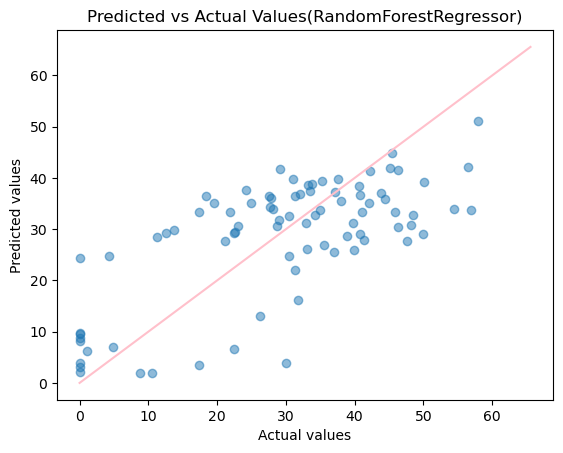

In [264]:
plt.scatter(y_test, rfr_pred, alpha=0.5 )

plt.plot([y.min(), y.max()],[y.min(), y.max()], color = "pink")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Values(RandomForestRegressor)")



plt.show()

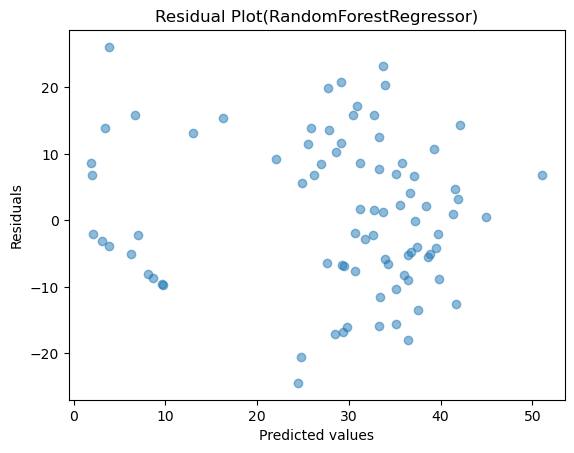

In [265]:
plt.scatter(rfr_pred, y_test - rfr_pred, alpha=0.5 )
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot(RandomForestRegressor)")
plt.show()

# GradientBoostingRegressor

In [266]:
gbr = GradientBoostingRegressor(random_state=42)

In [267]:
gbr

GradientBoostingRegressor(random_state=42)

In [268]:
gbr.fit(X_train_scaled ,y_train)

GradientBoostingRegressor(random_state=42)

In [269]:
gbr_pred = gbr.predict(X_test_scaled)

In [270]:
gbr_pred

array([40.44717319, 36.49822649, 21.57237439, -1.3134681 , 21.34161456,
       29.81835591, 29.52999306, 31.9536469 , 25.80796562, 39.11783117,
       41.71472367, 51.23819719,  9.16500404,  3.92880024, 35.58909765,
       30.77910866, 43.32332013, 41.37443254, 41.68572166, 23.07764166,
       50.73743196, 31.19238127, 35.87052511, 15.82563614, 38.28082088,
       35.14070577, 37.80271119, 41.1346738 , 36.38934336, 28.27896072,
       31.13042079, 11.22254673, 18.3056881 , 35.15173038, 35.06801674,
       24.6564669 , 37.14392761, 33.27880035, 33.68807516, 32.74487806,
       14.35917919, -3.38571812, 37.7473171 , 33.03386176,  5.21765905,
       29.28605929, 39.49921888, 31.09407486,  7.95442427, 26.53037099,
       33.15952228, 28.17385341,  5.60255265,  5.52415826,  0.32624429,
       29.61186988, 32.28918935, 23.62155509, 30.09296791, 35.94966646,
       36.82102522, 39.63421946, 36.99776908, 37.04388493, 30.56311418,
        1.33217587, 23.56106235, 18.69298867, 34.49222659, 46.71

In [271]:
mae = mean_absolute_error(y_test, gbr_pred)
r2 = r2_score(y_test, gbr_pred)

In [272]:
gbr = {"MAE": mae, "R²": r2}

In [273]:
gbr

{'MAE': 9.371074534310731, 'R²': 0.4929214175635832}

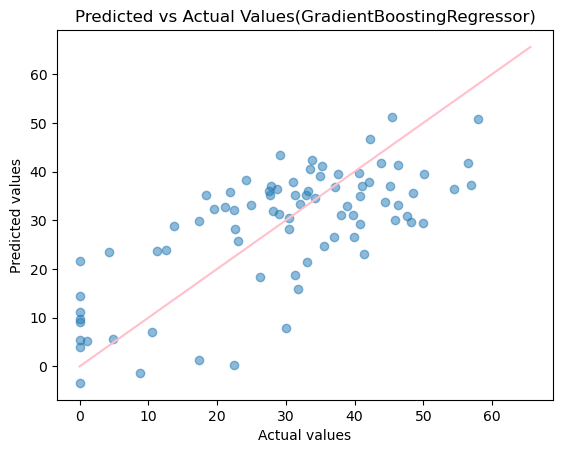

In [274]:
plt.scatter(y_test, gbr_pred, alpha=0.5 )

plt.plot([y.min(), y.max()],[y.min(), y.max()], color = "pink")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Values(GradientBoostingRegressor)")



plt.show()

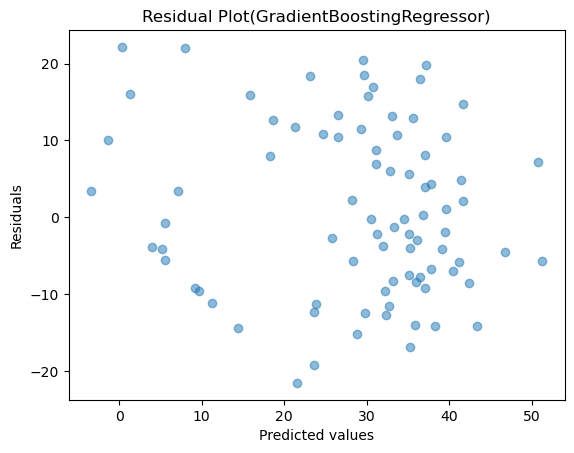

In [275]:
plt.scatter(gbr_pred, y_test - gbr_pred, alpha=0.5 )
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot(GradientBoostingRegressor)")
plt.show()


In [276]:
print('Linear Regression', lr),
print('DecisionTreeRegressor', dtr),
print('RandomForestRegressor', rfr),
print('GradientBoostingRegressor', gbr)

Linear Regression {'MAE': 8.371857019065425, 'R²': 0.585128293824156}
DecisionTreeRegressor {'MAE': 13.190915622589813, 'R²': -0.10990054995740706}
RandomForestRegressor {'MAE': 9.378678892935023, 'R²': 0.4753960675027662}
GradientBoostingRegressor {'MAE': 9.371074534310731, 'R²': 0.4929214175635832}


With the lowest MAE (8.37) and greatest R² (0.58) of the models examined, Linear Regression is the model that performs the best. It implies that, for this dataset, Linear Regression is quite effective despite its simplicity.

With the greatest MAE (13.19) and lowest R² (-0.10), the Decision Tree Regressor may be overfitting to the training set and underperforming on the test set. The Random Forest Regressor and Gradient Boosting Regressor, on the other hand, perform somewhat worse than the Linear Regression model but better than the Decision Tree, with comparable MAEs (9.89 and 10.00, respectively) and R2 values (0.51 and 0.48, respectively).